In [1]:
import sys
import os

# Add the src folder to the path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [2]:
from SWIM import WaterBalanceModule

### 🌍 Watershed Delineation from Flow Direction Raster

An essential step in hydrological modeling is the **delineation of the watershed**, which defines the spatial extent contributing runoff to a specific outlet point. In this project, we perform automatic watershed delineation using a flow direction raster and a pour point location.

The process leverages the function `delineate_watershed_from_raster`, which implements upstream tracing based on the **D8 flow direction model**. This model assumes that water flows from each cell to one of its eight neighbors, depending on the steepest descent path.

Using this function, the catchment area is delineated by:

- Reading the flow direction raster (usually derived from a DEM),
- Snapping the pour point to the nearest valid stream cell (if needed),
- Applying flow accumulation logic to identify all upstream cells draining into the pour point,
- Converting the resulting mask into a polygon geometry for subsequent geospatial analyses.

The **flow direction** and **accumulation** raster datasets used in this analysis were obtained from the [HydroSHEDS](https://www.hydrosheds.org) database, which provides high-resolution hydrological data derived from satellite-based elevation models. These global datasets ensure consistency and reliability across different basins and regions.

This automated delineation approach ensures spatial consistency and facilitates the integration with climate, hydrological and land use data, enabling reliable and reproducible workflows for catchment-scale modeling.


In [3]:
y1,x1 = [7.134245418549412, -75.66251481454375] # Ituango Dam 
y2,x2 = [6.166183453891647, -75.60315908625327] # Medellin River (Envigado)

In [4]:
swim_1 = WaterBalanceModule()

gdf_Ituango, snapped_coords_1  = swim_1.delineate_watershed_from_raster(
    dir_raster_path='../data/terrain/sa_dir_3s_COLOMBIA.tif',
    acc_raster_path='../data/terrain/sa_acc_3s_COLOMBIA.tif',
    output_shapefile_path='../data/terrain/Ituango_basin.shp',
    pour_point_coords=(x1, y1)
)


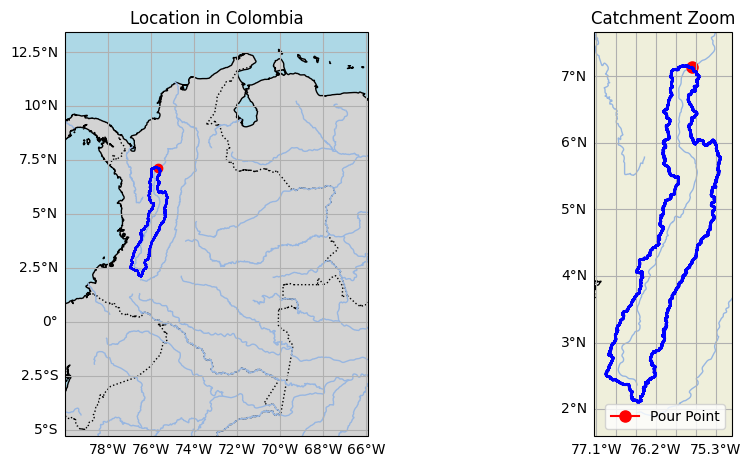

In [5]:
swim_1.plot_catchment_country_and_zoom(gdf_Ituango, pour_point_coords=snapped_coords_1, title="Cauca Watershed")

In [6]:
swim_2 = WaterBalanceModule()

gdf_Medellin, snapped_coords_2  = swim_2.delineate_watershed_from_raster(
    dir_raster_path='../data/terrain/sa_dir_3s_COLOMBIA.tif',
    acc_raster_path='../data/terrain/sa_acc_3s_COLOMBIA.tif',
    output_shapefile_path='../data/terrain/Medellin_basin.shp',
    pour_point_coords=(x2, y2)
)

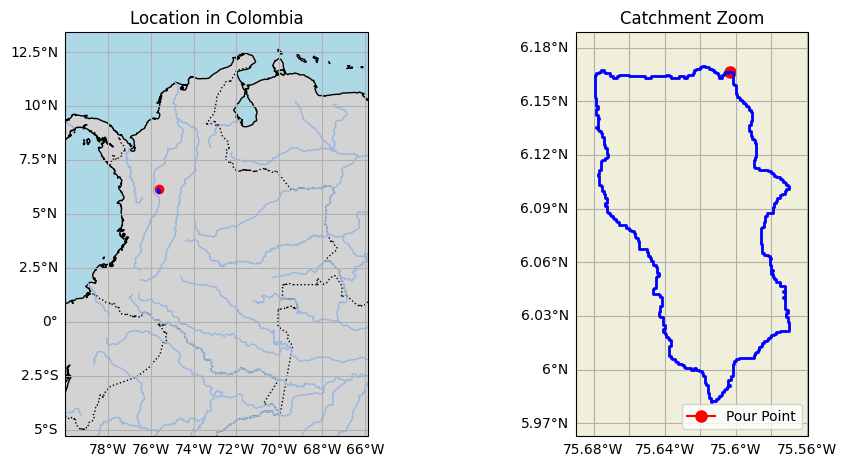

In [7]:
swim_2.plot_catchment_country_and_zoom(gdf_Medellin, pour_point_coords=snapped_coords_2, title="Medellín Watershed")